<a href="https://colab.research.google.com/github/julioLeopoldino/computacao_grafica/blob/main/aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
largura = 400
altura = 400
imagem = np.zeros((altura, largura,3), dtype = np.uint8) # linha padrão para gerar imagem
intensidade = 200
imagem[:,:,:] = intensidade

plt.imshow(imagem)
plt.axis('off')
plt.title("Iluminação Básica")
plt.show()

**Simulação de Física da luz**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
largura = 400
altura = 400
imagem = np.zeros((altura, largura, 3), dtype = np.uint8) # linha padrão para gerar imagem

for y in range(altura):
  intensidade = int(255 * (y/altura)) # percorrer linha a linha
  imagem[y,:,:]  = [intensidade, intensidade, intensidade] # colocando as cores na imagm para fazer o degrade

plt.imshow(imagem)
plt.axis('off')
plt.title("Simulação de Física da Luz")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
largura = 400
altura = 400
imagem = np.zeros((altura, largura, 3), dtype = np.uint8) # linha padrão para gerar imagem

for y in range(altura):
  vermelho = int(255 * (y/altura))
  verde = int(255 * ((altura - y)/altura))
  azul = 128
  imagem [y,:,:] = [vermelho, verde, azul]

plt.imshow(imagem)
plt.axis('off')
plt.title("Luz, sombra e cores")
plt.show()

**Interpolação** **Linear**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
largura = 400
altura = 400
imagem = np.zeros((altura, largura, 3), dtype = np.uint8) # linha padrão para gerar imagem

cor1 = [255, 0, 0]
cor2 = [0, 0, 255]

for x in range(largura):
  t = x / largura
  corInterpolada = (1-t) * np.array(cor1) + t * np.array(cor2)
  imagem[:, x, :] = corInterpolada.astype(np.uint8)

plt.imshow(imagem)
plt.axis('off')
plt.title("Luz, sombra e cores")
plt.show()

# Interpolação Avançada(Bilinear) ⭐




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
largura = 400
altura = 400
imagem = np.zeros((altura, largura, 3), dtype = np.uint8) # linha padrão para gerar imagem

cor_sup_esq=[255,0,0]
cor_sup_dir=[0,255,0]
cor_inf_esq=[0,0,255]
cor_inf_dir=[255,255,0]

for y in range(altura):
  for x in range(largura):
    tx = x / (largura -1)
    ty = y / (altura - 1)
    cor_superior = (1 -tx) *np.array(cor_sup_esq) + tx * np.array(cor_sup_dir)
    cor_inferior = (1 -tx) *np.array(cor_inf_esq) + tx * np.array(cor_inf_dir)
    cor_interpolada = (1 -ty) * cor_superior +ty * cor_inferior
    imagem[y,x,:] = cor_interpolada.astype(np.uint)

plt.imshow(imagem)
plt.axis('off')
plt.title("Interpolação Bilinear")
plt.show()

**Transformações Geométricas (Translação)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
largura = 400
altura = 400
imagem = np.zeros((altura, largura, 3), dtype = np.uint8) # linha padrão para gerar imagem

imagem_origem = np.zeros((altura, largura, 3), dtype = np.uint8)
imagem_origem[150:250, 150:250, :] = [255,0,0]

#parametro de translação
dx = 60
dy = 150

for y in range(altura):
  for x in range(largura):
    xOrigem = x - dx
    yOrigem = y - dy
    if 0<=xOrigem < largura and 0 <= yOrigem < largura:
      imagem[y,x,:] = imagem_origem[yOrigem, xOrigem, :]


plt.imshow(imagem)
plt.axis('off')
plt.title("Interpolação Bilinear")
plt.show()

**Rasterização de linhas**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

largura = 400
altura = 400
imagem = np.zeros((altura, largura,3), dtype = np.uint8)

#Ponto inicial e final da linha
x1 = 100
y1 = 100
x2 = 300
y2 = 300

**Algoritmo de Bresenham**

O algoritmo de Bresenham permite desenhar linhas de forma eficiente ao considerar a inclinação da linha e escolher os pixels mais proximos real da linha para ser coloridos, evitando linhas irregulares e serrilhadas

In [ ]:
dx = abs(x2 - x1) #abs seria para retornar um numero positivo
dy = abs(y2 - y1)
sx = 1 if x1 < x2 else -1
sy = 1 if y1 < y2 else -1
erro = dx - dy

while x1 != x2 or y1 != y2:
  imagem[y1, x1, :] = [255,255,255] # os dois pontos( : )no terceiro parâmetro é para imprimir tudo dentro do array
  erro2 = 2 * erro
  if erro2 > -dy:
    erro -= dy
    x1 += sx
  if erro2 < dx:
    erro += dx
    y1 +=sy

plt.imshow(imagem)
plt.axis('off')
plt.title("Rasterização de linha")
plt.show()

**Curva de Bézier Quadratica**

In [38]:
import matplotlib.pyplot as plt
import numpy as np

largura = 400
altura = 400
imagem = np.zeros((altura,largura,3),dtype=np.uint8)


A curva de bézier é um conceito em computção grafica para descrever formas suaves. Esta curva é representada por tres pontos de controle. A equação da calcula os pontos intermediarios entre os pontos de controle, criando uma trajetoria suave. A curva é definida pela interpolação dos pontos de controle e suas combinações ponderadas, proporciionando flexibilidade na criação de formas curvas

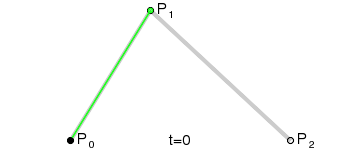

In [39]:
# Pontos de Controle
p0 = np.array([50,300])
p1 = np.array([150,100])
p2 = np.array([300,300])

# Parâmetro da curva
t = np.linspace(0,1,100)  #o linspace é para sair de 0 ate 100 digitos

In [40]:
def bezier_quadratica(p0,p1,p2,t):
  return np.outer((1-t)**2,p0)+ np.outer(2*(1-t)*t,p1)+np.outer(t**2,p2) # outer é para trabalhar com dois vetores

In [41]:
# Aplicando a curva
pontos_curva = bezier_quadratica(p0,p1,p2,t)
pontos_curva = pontos_curva.astype(int) # astype foi para transformar os pontos da curva para inteiro

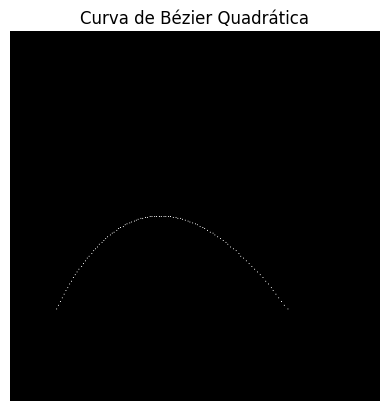

In [43]:
for ponto in pontos_curva:
  x, y = ponto
  if 0 <= x < largura and 0 <= y < altura:
    imagem[y,x,:] = [255,255,255] # RGB

plt.imshow(imagem)
plt.axis('off')
plt.title('Curva de Bézier Quadrática')
plt.show()